# Case Study 1

### CASE STUDY ON ENSEMBLE LEARNING
The Loan Dataset of a bank is given
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Perform Ensemble Learning techniques in the given dataset and tune the
hyperparameters. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading Data

In [4]:
data=pd.read_csv('train_loan.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 2. Pre Processing

### Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are missing values. So need to treat them.

###  Fill Missing Values

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Mean and 50 % of Applicant Income shows diffrence so need to check for outliers. credit history null values can be filled with value 1 and Loan_Amount Term can be filled with 360.

#### Filling categorical null values with mode

In [11]:
for col in data.columns:
    if data[col].dtype == 'O':
        data[col].fillna(data[col].mode()[0], inplace = True)

In [12]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### filling credit history with 1

In [13]:
data['Credit_History'].fillna(1, inplace = True)

In [16]:
data['Loan_Amount_Term'].fillna(360, inplace = True)

In [17]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [24]:
data.LoanAmount.unique()


array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

<AxesSubplot:xlabel='LoanAmount'>

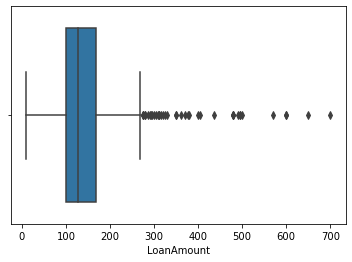

In [26]:
sns.boxplot(x = data['LoanAmount'])

Since outliers are there, we will fill with median

In [27]:
 data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)

In [28]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Scaling

#### Encoding

In [29]:
#selecting object features
obj = data.select_dtypes(include = object)
obj

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [30]:
data1=data
#dropping the column Loan_ID
data=data.drop(['Loan_ID'],axis=1)

In [40]:
data.Property_Area.unique()

array([2, 0, 1])

In [32]:
## dummy encoding of nominal data
data['Gender'] = pd.get_dummies(data['Gender'], drop_first = True)
data['Married'] = pd.get_dummies(data['Married'], drop_first = True)
data['Education'] = pd.get_dummies(data['Education'], drop_first = True)
data['Self_Employed'] = pd.get_dummies(data['Self_Employed'], drop_first = True)

In [39]:
## Label encoding for ordinal datas:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Property_Area'] = encoder.fit_transform(data['Property_Area'])
data['Dependents'] = encoder.fit_transform(data['Dependents'])
data['Loan_Status'] = encoder.fit_transform(data['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome'>

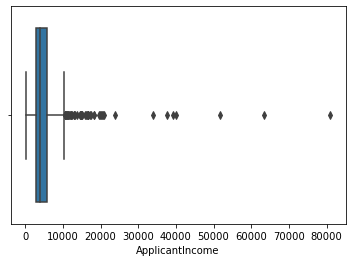

In [46]:
## 'ApplicantIncome' and 'CoapplicantIncome' have a lot of variation in its values
sns.boxplot(x = data['ApplicantIncome'])

C:\Users\vsree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

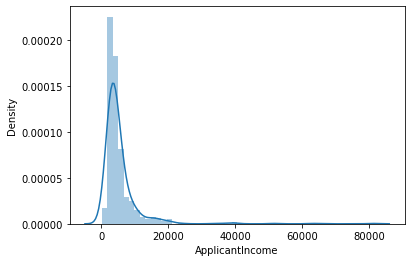

In [47]:
sns.distplot(data['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

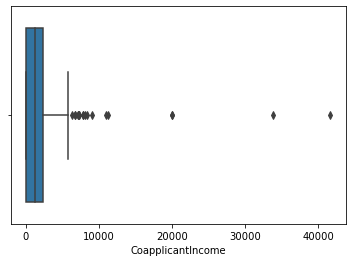

In [49]:
sns.boxplot(x = data['CoapplicantIncome'])

C:\Users\vsree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

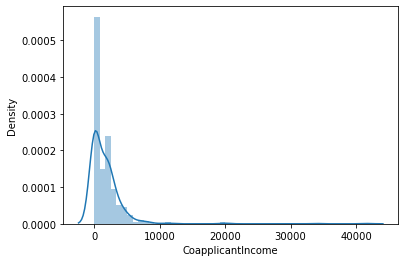

In [50]:
sns.distplot(data['CoapplicantIncome'])

both Applicant and CoapplicantIncome are right skewed. Standarize so that values are in better distribution.

In [52]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
data['ApplicantIncome'] = std_sc.fit_transform(data[['ApplicantIncome']])
data['CoapplicantIncome'] = std_sc.fit_transform(data[['CoapplicantIncome']])

data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,128.0,360.0,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,128.0,360.0,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,66.0,360.0,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,120.0,360.0,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,71.0,360.0,1.0,0,1
610,1,1,3,0,0,-0.212557,-0.554487,40.0,180.0,1.0,0,1
611,1,1,1,0,0,0.437174,-0.472404,253.0,360.0,1.0,2,1
612,1,1,2,0,0,0.357064,-0.554487,187.0,360.0,1.0,2,1


C:\Users\vsree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

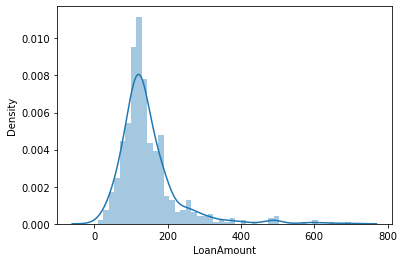

In [53]:
sns.distplot(data['LoanAmount'])

In [54]:
## log scaling 
data['LoanAmount'] = np.log(data['LoanAmount'])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,4.852030,360.0,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,4.852030,360.0,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,4.189655,360.0,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,4.787492,360.0,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,4.262680,360.0,1.0,0,1
610,1,1,3,0,0,-0.212557,-0.554487,3.688879,180.0,1.0,0,1
611,1,1,1,0,0,0.437174,-0.472404,5.533389,360.0,1.0,2,1
612,1,1,2,0,0,0.357064,-0.554487,5.231109,360.0,1.0,2,1


In [55]:
## split the data into train and test datas 
from sklearn.model_selection import train_test_split
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']
## 80% train data  ;  20% test data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 20)

## Models

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
#log_reg = LogisticRegression()
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced')
log_reg_model = log_reg.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)

In [57]:
## metrics to checks the accuracy, precision, recall
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score

In [58]:
print('Confusion matrix: \n', confusion_matrix(y_test, log_reg_pred))

Confusion matrix: 
 [[51  0]
 [ 0 72]]


In [59]:
print("Accuracy:",accuracy_score(y_test, log_reg_pred))
print("Precision:",precision_score(y_test, log_reg_pred, pos_label=1))
print("Recall:",recall_score(y_test, log_reg_pred, pos_label=1))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## KNN classifier 

In [60]:
## check for optimum k value; we are using minkowski as the distance metric

from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3, 15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    Classifier.fit(X_train, y_train)
    knn_pred = Classifier.predict(X_test)
    acc_values.append(accuracy_score(y_test, knn_pred))

    
acc_values 

[0.8943089430894309,
 0.9024390243902439,
 0.8780487804878049,
 0.8780487804878049,
 0.8292682926829268,
 0.9105691056910569,
 0.8536585365853658,
 0.8699186991869918,
 0.8536585365853658,
 0.8699186991869918,
 0.8292682926829268,
 0.8373983739837398]

Text(0, 0.5, 'accuracy')

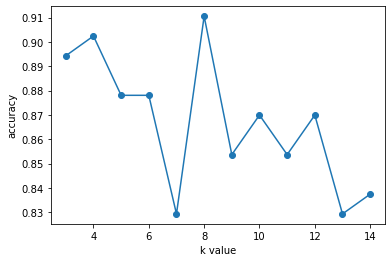

In [61]:
# visual representation 
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

At k = 8 is when accuracy is highest

In [62]:
Classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
Classifier.fit(X_train, y_train)
knn_pred = Classifier.predict(X_test)

In [63]:
print("Accuracy:",accuracy_score(y_test, knn_pred))
print("Precision:",precision_score(y_test, knn_pred))
print("Recall:",recall_score(y_test, knn_pred))

Accuracy: 0.9105691056910569
Precision: 0.8860759493670886
Recall: 0.9722222222222222


In [64]:
print('Confusion matrix: \n', confusion_matrix(y_test, knn_pred))

Confusion matrix: 
 [[42  9]
 [ 2 70]]


# Support Vector Machine)
1. Kernel = linear
2. Kernel = rbf (radial basis function)

In [65]:
from sklearn.svm import SVC

In [66]:
## svm using linear kernel
svm_clf = SVC(kernel = 'linear')
svm_model = svm_clf.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [67]:
print('Confusion matrix :\n', confusion_matrix(y_test, svm_pred))

Confusion matrix :
 [[51  0]
 [ 0 72]]


In [68]:
print("Accuracy:",accuracy_score(y_test, svm_pred))
print("Precision:",precision_score(y_test, svm_pred))
print("Recall:",recall_score(y_test, svm_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [69]:
## svm using rbf kernel
svm_clf_rbf = SVC(kernel = 'rbf')
svm_model_rbf = svm_clf_rbf.fit(X_train, y_train)
svm_pred_rbf = svm_model_rbf.predict(X_test)

In [70]:
print('Confusion matrix : \n', confusion_matrix(y_test, svm_pred_rbf))

Confusion matrix : 
 [[ 0 51]
 [ 0 72]]


In [71]:
print("Accuracy:",accuracy_score(y_test, svm_pred_rbf))
print("Precision:",precision_score(y_test, svm_pred_rbf))
print("Recall:",recall_score(y_test, svm_pred_rbf))

Accuracy: 0.5853658536585366
Precision: 0.5853658536585366
Recall: 1.0


## Linear Regression


In [72]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(X_train, y_train) 
lr_pred = lr_model.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE      :", mean_squared_error(y_test,lr_pred))
print('R2 Score :',r2_score(lr_pred,y_test))

MSE      : 3.726627051232409e-31
R2 Score : 1.0


### Bagging Regressor

In [74]:
# importing Bagging Regressor
from sklearn.ensemble import BaggingRegressor
# importing Decision Tree Regressor (using it as base estimator)
from sklearn.tree import DecisionTreeRegressor
# Create instance of DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=16)
# Create instance of Bagging Regressor
bg_reg = BaggingRegressor(base_estimator=dt_reg, n_estimators=500, random_state=42)

# Fitting model
bg_reg.fit(X_train,y_train)
# Predicting model
bg_pred = bg_reg.predict(X_test)

In [75]:
# Error Analysis
print('Mean Squared Error: ', mean_squared_error(bg_pred,y_test))
print('R2 Score          : ', r2_score(bg_pred,y_test))

Mean Squared Error:  0.0
R2 Score          :  1.0


### Random Forest Regressor

In [76]:
# importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#create instance
rf_reg = RandomForestRegressor(random_state=42,max_depth=16,n_estimators=500)

# fitting model
rf_model = rf_reg.fit(X_train,y_train)
# Predicting Model
rf_pred = rf_model.predict(X_test)

In [77]:
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(rf_pred,y_test))
print('R2 Score          : ',r2_score(rf_pred,y_test))

Mean Squared Error:  0.0
R2 Score          :  1.0


### AdaBoost Regressor

In [78]:
from sklearn.ensemble import AdaBoostRegressor
#instance creation
abt = AdaBoostRegressor(n_estimators=500,random_state=42)

#model creation
abt_model = abt.fit(X_train,y_train)
#output prediction
abt_pred = abt_model.predict(X_test)

In [79]:
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(abt_pred,y_test))
print('R2 Score          : ',r2_score(abt_pred,y_test))

Mean Squared Error:  0.0
R2 Score          :  1.0


### Gradient Boost Regressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
#instance creation
gbt = GradientBoostingRegressor(n_estimators=500,max_depth=16,random_state=42)

#model creation
gbt_model = gbt.fit(X_train,y_train)
#output prediction
gbt_pred = gbt_model.predict(X_test)

In [82]:
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(gbt_pred,y_test))
print('R2 Score          : ',r2_score(gbt_pred,y_test))

Mean Squared Error:  2.539661448522757e-16
R2 Score          :  0.999999999999999


### Hyperparameter Tuning Using GridSearchCV

In [83]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [88]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Tuning Random Forest

In [85]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
21,1,1,1,0,0,0.090356,1.369336,5.752573,360.0,1.0,2,1
105,1,1,1,0,0,-0.385228,-0.202214,4.605170,360.0,1.0,2,1
206,0,0,0,0,0,-0.353774,-0.554487,4.382027,360.0,1.0,2,1
182,1,1,0,0,0,-0.131627,-0.554487,4.290459,180.0,1.0,1,1
323,0,0,0,0,0,-0.366552,0.466422,4.882802,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,1,2,0,0,-0.066097,-0.554487,4.276666,360.0,0.0,1,0
223,1,1,0,0,0,0.356245,-0.209054,5.164786,360.0,1.0,1,1
271,1,1,0,0,0,0.940773,-0.554487,4.912655,360.0,1.0,2,1
474,1,0,2,0,0,0.021058,1.035190,5.087596,360.0,1.0,0,1


In [89]:
# Define a grid of hyperparameter 'params_rf' 
params_rf = {'n_estimators': list(range(100, 1100, 200)), #[200,300,500],
             'max_depth': [4] + list(range(8, 65, 8)),  #[8,12,16],
             'max_features': ['log2', 'sqrt'],
             }

#Instance creation - we are using RandomForest as the base estimator 
grid_rf = GridSearchCV(estimator=RandomForestRegressor(),                        
                       param_grid=params_rf,                         
                       cv=3,                        
                       #scoring='r2_score',                        
                       verbose=1, 
                       error_score="raise",                       
                       n_jobs=-1) 

#model creation
grid_rf.fit(X_train, y_train)
# output prediction
y_pred = grid_rf.predict(X_test)

# Extract best hyperparameters from 'grid_rf' 
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_rf' 
best_CV_score = grid_rf.best_score_ 
print('Best CV Score: ',best_CV_score)

# Extract best model from 'grid_rf' 
best_model = grid_rf.best_estimator_
print('Best Estimator:\n', best_model)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best hyerparameters:
 {'max_depth': 16, 'max_features': 'sqrt', 'n_estimators': 900}
Best CV Score:  0.9861078227918464
Best Estimator:
 RandomForestRegressor(max_depth=16, max_features='sqrt', n_estimators=900)


In [90]:
# Using these parameters to tune Random Forest Regressor
#create instance
tuned_rf_reg = best_model #RandomForestRegressor(max_depth=8, max_features='log2', n_estimators=200, random_state=42)

# fitting model
tuned_rf_reg.fit(X_train,y_train)
# Predicting Model
rf1_pred = tuned_rf_reg.predict(X_test)
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(rf1_pred,y_test))
print('R2 Score: ',r2_score(rf1_pred,y_test))

Mean Squared Error:  0.0021583792130870183
R2 Score:  0.989801064159791


In [91]:
# Define a grid of hyperparameter 'params_rf' 
params_rf = {'n_estimators': list(range(100, 1100, 200)), #[200,300,500],
             'max_depth': [4] + list(range(8, 65, 8)),  #[8,12,16],
             'max_features': ['log2', 'sqrt']
            }

#Instance creation - we are using GradientBoost as the base estimator 
grid_gb = GridSearchCV(estimator=gbt,                        
                       param_grid=params_rf,                         
                       cv=3,                        
                       #scoring='accuracy',                        
                       verbose=1,                        
                       n_jobs=-1) 
#model creation
grid_gb.fit(X_train,y_train)
# output prediction
y_pred = grid_gb.predict(X_test)

# Extract best hyperparameters from 'grid_gb' 
best_hyperparams = grid_gb.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_gb' 
best_CV_score = grid_gb.best_score_ 
print('Best CV Score: ',best_CV_score)

# Extract best model from 'grid_gb' 
best_model = grid_gb.best_estimator_
print('Best Estimator:\n',best_model)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 900}
Best CV Score:  0.992472785536686
Best Estimator:
 GradientBoostingRegressor(max_depth=4, max_features='log2', n_estimators=900,
                          random_state=42)


In [92]:
## Using these parameters to tune Gradient Boost Regressor
#instance creation
tuned_gbt = best_model #GradientBoostingRegressor(n_estimators=300,max_depth=8,max_features='log2',random_state=42)
#model creation
tuned_gbt.fit(X_train,y_train)
#output prediction
gbt1_pred = tuned_gbt.predict(X_test)
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(gbt1_pred,y_test))
print('R2 Score: ', r2_score(gbt1_pred,y_test))

Mean Squared Error:  0.0011183457905106417
R2 Score:  0.995225759182322
